In [1]:
import pandas as pd
from ast import literal_eval
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib
cmap = matplotlib.colormaps['viridis']

In [4]:
test_df = pd.read_csv('data/results_test.csv', sep='\t',
                             converters= {'S_predict_local': literal_eval,
                                          'S_predict_global': literal_eval,
                                          'S_i_plus_1_classic': literal_eval,
                                          })

In [7]:
test_df.columns

Index(['q', 'total_sim_time', 'S0', 'P_imp', 'GWM_S_predict_local',
       'Local_S_predict_local', 'P_i_plus_1_classic', 'S_i_plus_1_classic',
       'nb_newton_classic', 'dt_sim_classic', 'norms_classic',
       'GWM_S_i_plus_1_hybrid', 'GWM_P_i_plus_1_hybrid',
       'GWM_nb_newton_hybrid', 'GWM_dt_sim_hybrid', 'GWM_norms_hybrid',
       'Local_S_i_plus_1_hybrid', 'Local_P_i_plus_1_hybrid',
       'Local_nb_newton_hybrid', 'Local_dt_sim_hybrid', 'Local_norms_hybrid',
       'S_DD_local', 'P_DD_local', 'S_i_plus_1_DD', 'P_i_plus_1_DD',
       'nb_newton_DD', 'dt_sim_DD', 'norms_DD'],
      dtype='object')

In [9]:
test_df_2 = test_df[['nb_newton_classic', 'Local_nb_newton_hybrid']]
test_sizes_df = test_df_2.groupby(test_df_2.columns.tolist(),as_index=False).size().values
normalized = 100*(test_sizes_df[:, 2] / test_sizes_df[:, 2].sum())
test_sizes_df = np.concatenate((test_sizes_df, np.array([normalized]).T), axis=1)

/var/folders/lb/7819f89d69v17j4h5j74p8kc0000gp/T/ipykernel_4102/1911666275.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_xticklabels(ticklabs, fontsize=20)


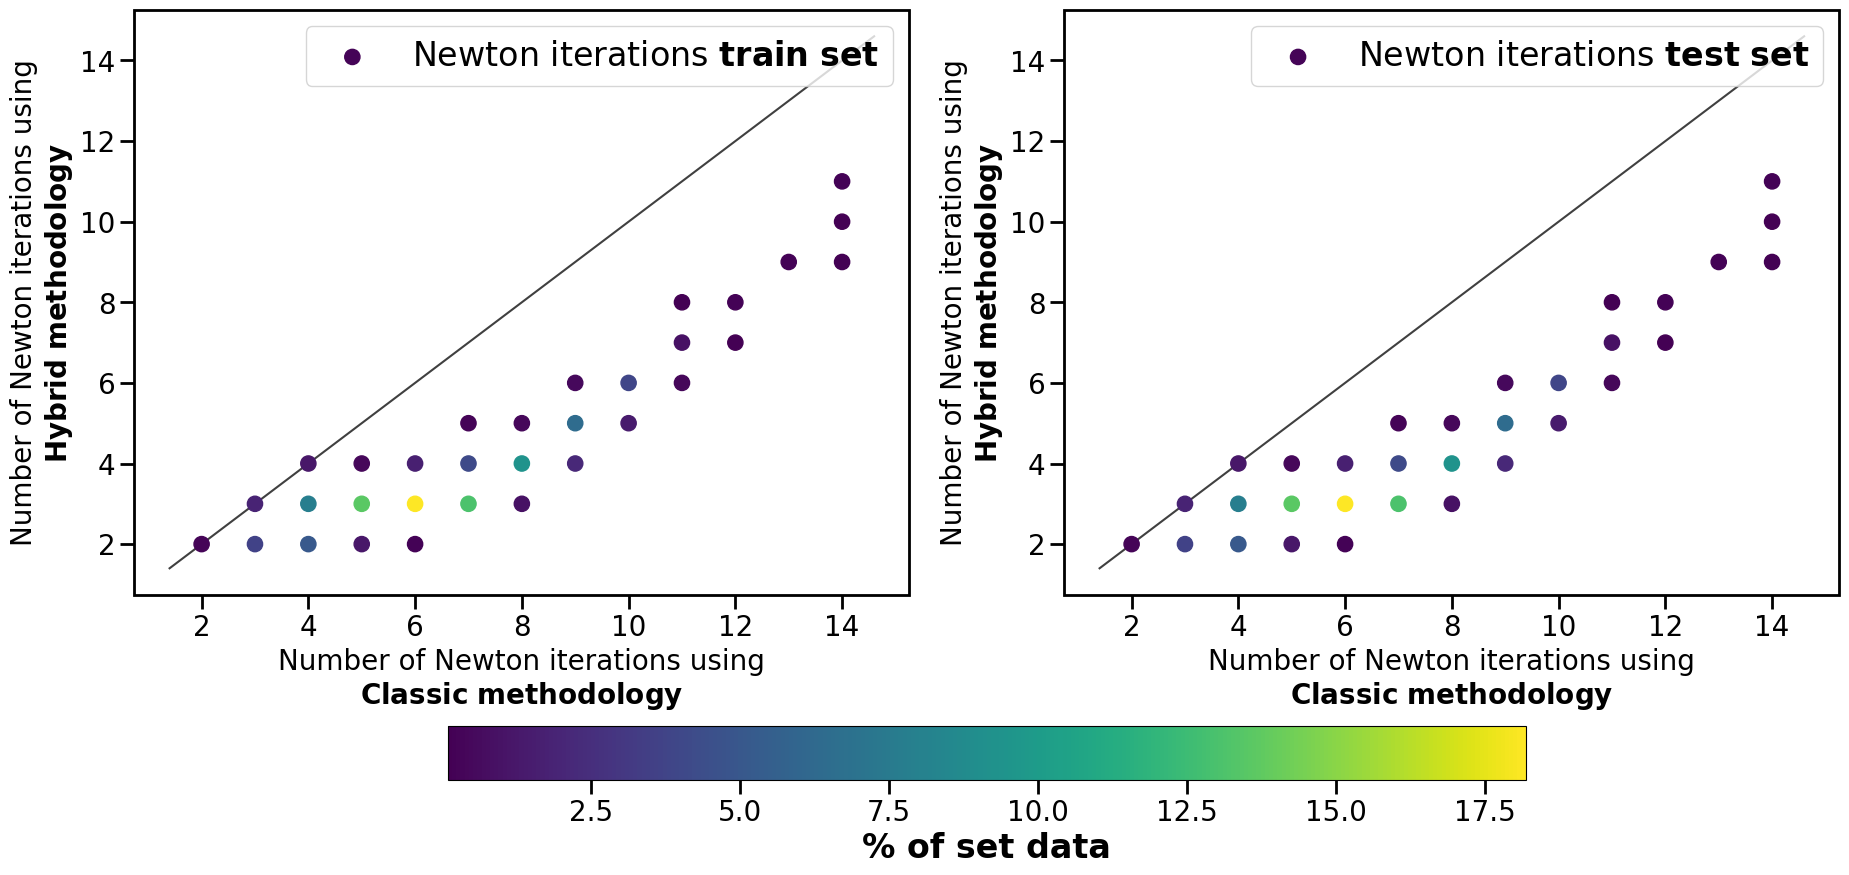

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (22, 10))

vmin = np.min(np.concatenate([test_sizes_df[:, 3],test_sizes_df[:, 3]]))
vmax = np.max(np.concatenate([test_sizes_df[:, 3],test_sizes_df[:, 3]]))


test_plot = ax2.scatter(x=test_sizes_df[:, 0],y=test_sizes_df[:, 1],
                label = r"Newton iterations $\bf{test}$ $\bf{set}$",
                c = test_sizes_df[:, 3], s=120, cmap=cmap)

test_plot.set_clim(vmin,vmax)

train_plot = ax1.scatter(x=test_sizes_df[:, 0],y=test_sizes_df[:, 1],
            label=r"Newton iterations $\bf{train}$ $\bf{set}$",
                c = test_sizes_df[:, 3], s=120, cmap=cmap)

train_plot.set_clim(vmin,vmax)


lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

ax1.set_xlabel(r'Number of Newton iterations using''\n'r'$\bf{Classic}$ $\bf{methodology}$', fontsize=20)
ax1.set_ylabel(r'Number of Newton iterations using''\n'r'$\bf{Hybrid}$ $\bf{methodology}$', fontsize=20)
ax1.legend(loc='upper right', fontsize=24)

ax2.set_xlabel(r'Number of Newton iterations using''\n'r'$\bf{Classic}$ $\bf{methodology}$', fontsize=20)
ax2.set_ylabel(r'Number of Newton iterations using''\n'r'$\bf{Hybrid}$ $\bf{methodology}$', fontsize=20)
ax2.legend(loc='upper right', fontsize=24)


ax1.patch.set_edgecolor('black')
ax1.patch.set_linewidth(2)
ax1.tick_params(axis='both', which='major', labelsize=20, width=2, length=10, labelcolor='black')

ax2.patch.set_edgecolor('black')
ax2.patch.set_linewidth(2)
ax2.tick_params(axis='both', which='major', labelsize=20, width=2, length=10, labelcolor='black')


cbar = fig.colorbar(test_plot,ax=[ax1, ax2],  orientation="horizontal", pad=0.17, fraction=0.07)

ticklabs = cbar.ax.get_xticklabels()

cbar.ax.set_xticklabels(ticklabs, fontsize=20)

cbar.set_label(label=r'% of set data', size=24, weight='bold')

cbar.ax.tick_params(labelsize=20, length=10, width=2)
plt.show()

In [13]:
test_df_2 = test_df[['nb_newton_classic', 'nb_newton_DD']]
test_sizes_df = test_df_2.groupby(test_df_2.columns.tolist(),as_index=False).size().values
normalized = 100*(test_sizes_df[:, 2] / test_sizes_df[:, 2].sum())
test_sizes_df = np.concatenate((test_sizes_df, np.array([normalized]).T), axis=1)

/var/folders/lb/7819f89d69v17j4h5j74p8kc0000gp/T/ipykernel_4102/1911666275.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_xticklabels(ticklabs, fontsize=20)


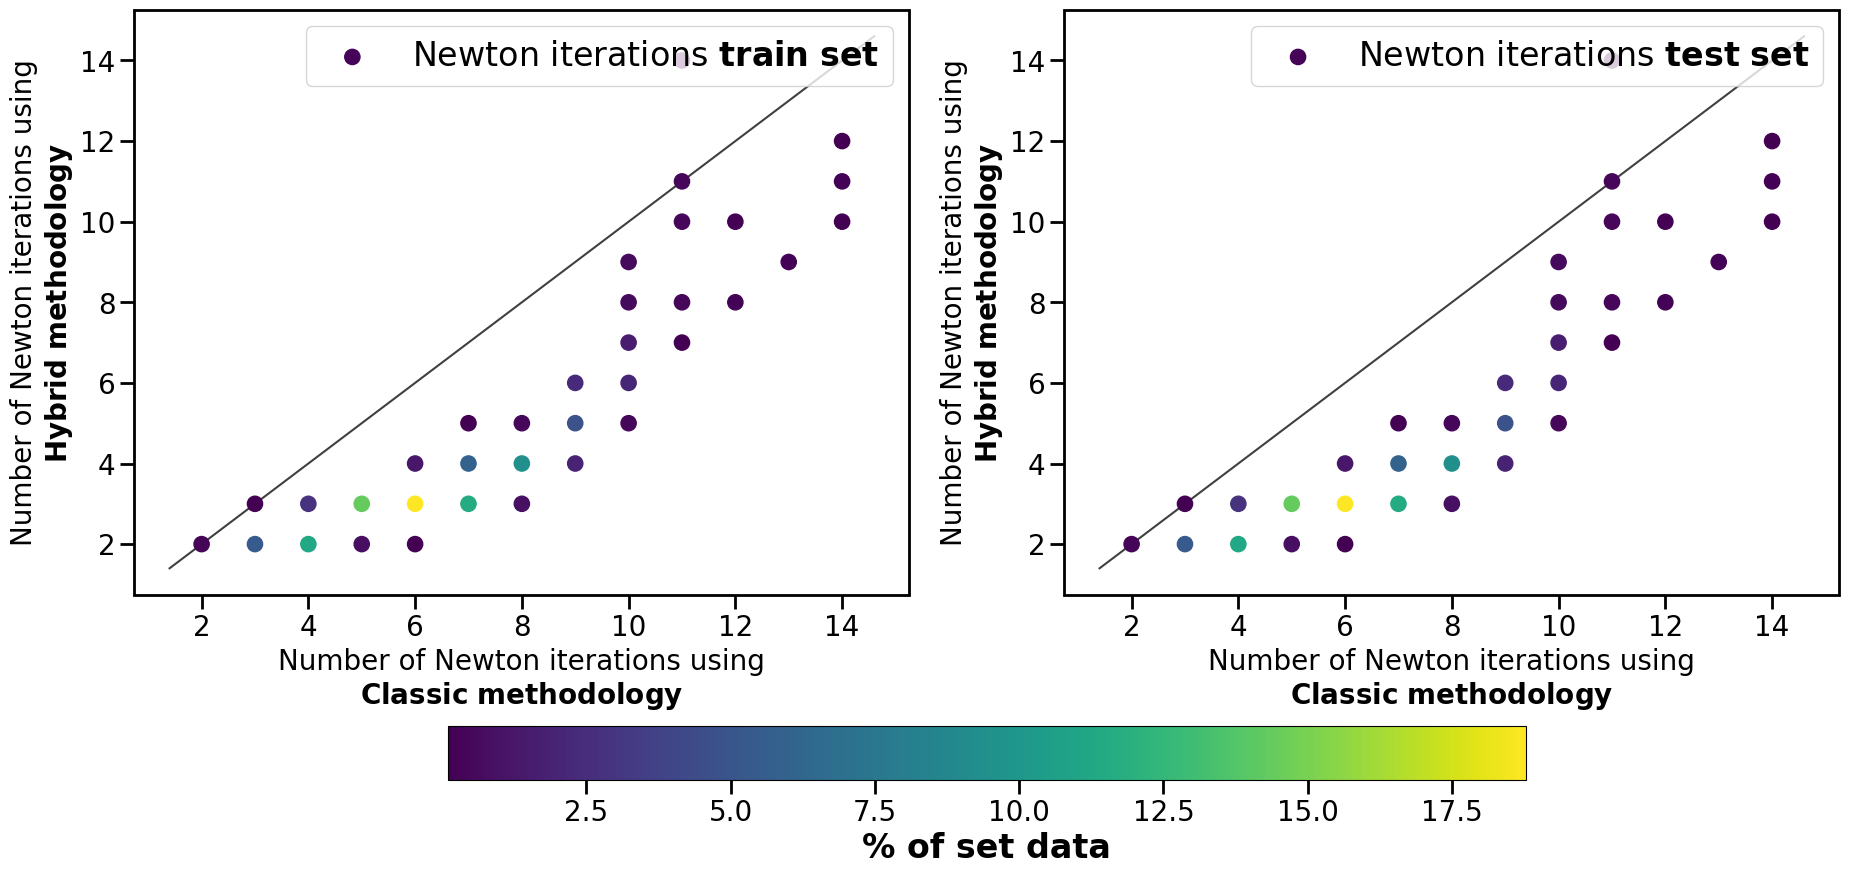

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (22, 10))

vmin = np.min(np.concatenate([test_sizes_df[:, 3],test_sizes_df[:, 3]]))
vmax = np.max(np.concatenate([test_sizes_df[:, 3],test_sizes_df[:, 3]]))


test_plot = ax2.scatter(x=test_sizes_df[:, 0],y=test_sizes_df[:, 1],
                label = r"Newton iterations $\bf{test}$ $\bf{set}$",
                c = test_sizes_df[:, 3], s=120, cmap=cmap)

test_plot.set_clim(vmin,vmax)

train_plot = ax1.scatter(x=test_sizes_df[:, 0],y=test_sizes_df[:, 1],
            label=r"Newton iterations $\bf{train}$ $\bf{set}$",
                c = test_sizes_df[:, 3], s=120, cmap=cmap)

train_plot.set_clim(vmin,vmax)


lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

ax1.set_xlabel(r'Number of Newton iterations using''\n'r'$\bf{Classic}$ $\bf{methodology}$', fontsize=20)
ax1.set_ylabel(r'Number of Newton iterations using''\n'r'$\bf{Hybrid}$ $\bf{methodology}$', fontsize=20)
ax1.legend(loc='upper right', fontsize=24)

ax2.set_xlabel(r'Number of Newton iterations using''\n'r'$\bf{Classic}$ $\bf{methodology}$', fontsize=20)
ax2.set_ylabel(r'Number of Newton iterations using''\n'r'$\bf{Hybrid}$ $\bf{methodology}$', fontsize=20)
ax2.legend(loc='upper right', fontsize=24)


ax1.patch.set_edgecolor('black')
ax1.patch.set_linewidth(2)
ax1.tick_params(axis='both', which='major', labelsize=20, width=2, length=10, labelcolor='black')

ax2.patch.set_edgecolor('black')
ax2.patch.set_linewidth(2)
ax2.tick_params(axis='both', which='major', labelsize=20, width=2, length=10, labelcolor='black')


cbar = fig.colorbar(test_plot,ax=[ax1, ax2],  orientation="horizontal", pad=0.17, fraction=0.07)

ticklabs = cbar.ax.get_xticklabels()

cbar.ax.set_xticklabels(ticklabs, fontsize=20)

cbar.set_label(label=r'% of set data', size=24, weight='bold')

cbar.ax.tick_params(labelsize=20, length=10, width=2)
plt.show()

In [15]:
test_df_2 = test_df[['nb_newton_classic', 'GWM_nb_newton_hybrid']]
test_sizes_df = test_df_2.groupby(test_df_2.columns.tolist(),as_index=False).size().values
normalized = 100*(test_sizes_df[:, 2] / test_sizes_df[:, 2].sum())
test_sizes_df = np.concatenate((test_sizes_df, np.array([normalized]).T), axis=1)

/var/folders/lb/7819f89d69v17j4h5j74p8kc0000gp/T/ipykernel_4102/1911666275.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_xticklabels(ticklabs, fontsize=20)


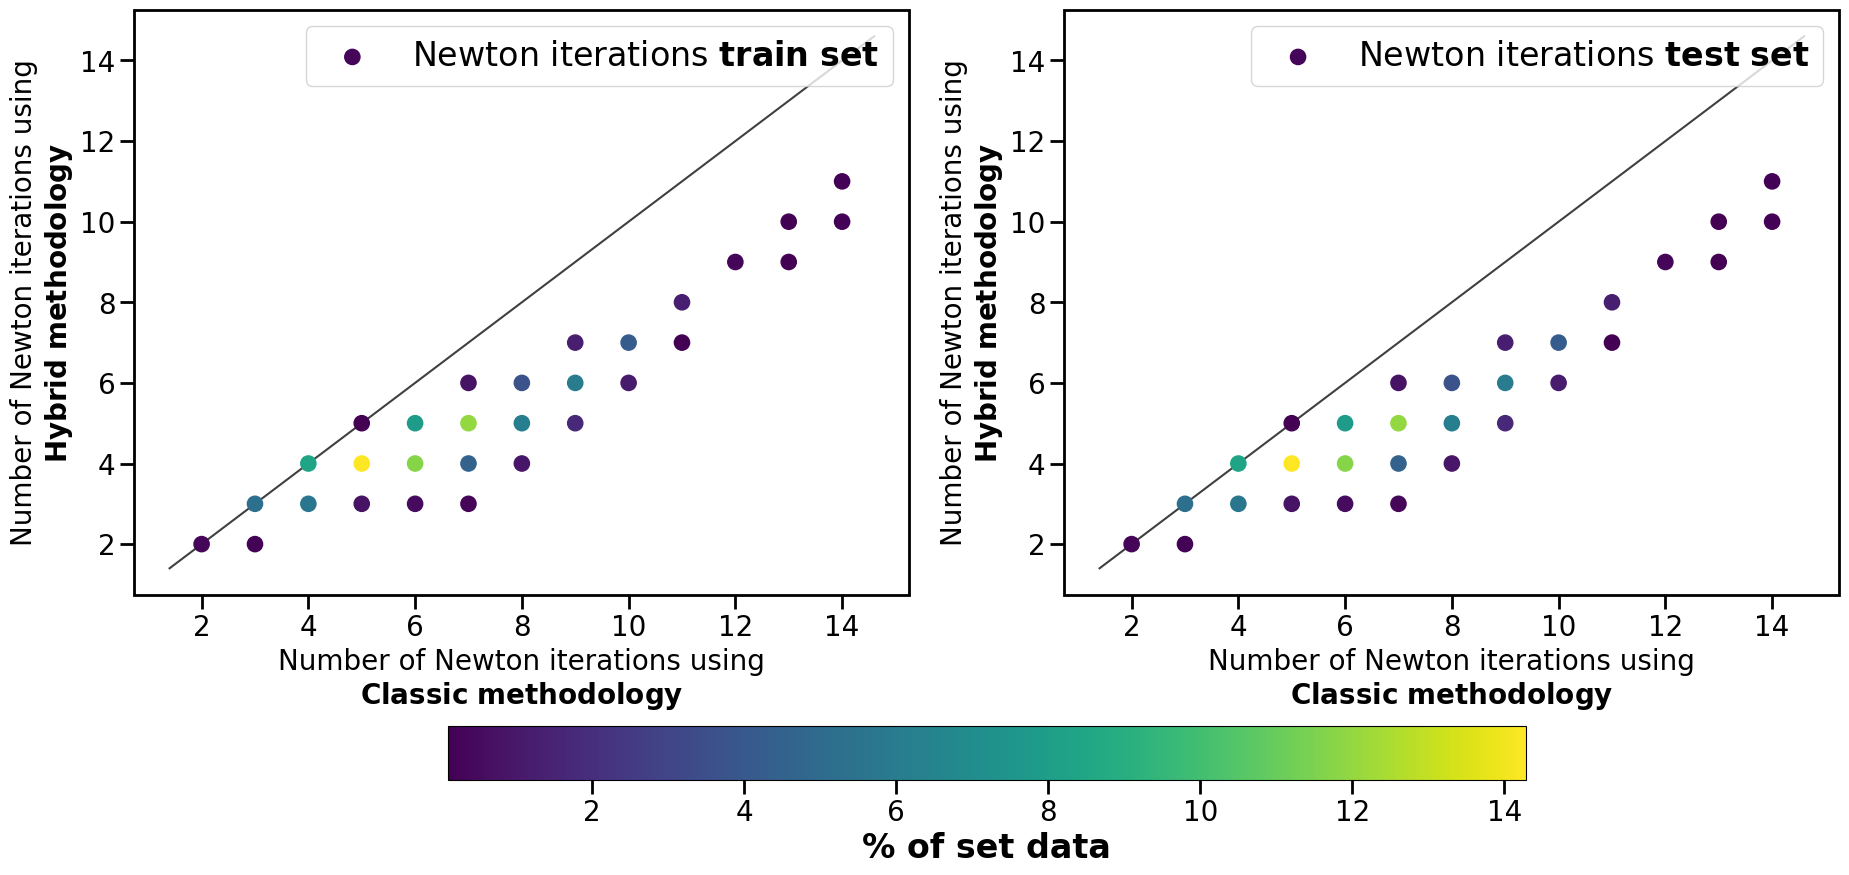

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (22, 10))

vmin = np.min(np.concatenate([test_sizes_df[:, 3],test_sizes_df[:, 3]]))
vmax = np.max(np.concatenate([test_sizes_df[:, 3],test_sizes_df[:, 3]]))


test_plot = ax2.scatter(x=test_sizes_df[:, 0],y=test_sizes_df[:, 1],
                label = r"Newton iterations $\bf{test}$ $\bf{set}$",
                c = test_sizes_df[:, 3], s=120, cmap=cmap)

test_plot.set_clim(vmin,vmax)

train_plot = ax1.scatter(x=test_sizes_df[:, 0],y=test_sizes_df[:, 1],
            label=r"Newton iterations $\bf{train}$ $\bf{set}$",
                c = test_sizes_df[:, 3], s=120, cmap=cmap)

train_plot.set_clim(vmin,vmax)


lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

ax1.set_xlabel(r'Number of Newton iterations using''\n'r'$\bf{Classic}$ $\bf{methodology}$', fontsize=20)
ax1.set_ylabel(r'Number of Newton iterations using''\n'r'$\bf{Hybrid}$ $\bf{methodology}$', fontsize=20)
ax1.legend(loc='upper right', fontsize=24)

ax2.set_xlabel(r'Number of Newton iterations using''\n'r'$\bf{Classic}$ $\bf{methodology}$', fontsize=20)
ax2.set_ylabel(r'Number of Newton iterations using''\n'r'$\bf{Hybrid}$ $\bf{methodology}$', fontsize=20)
ax2.legend(loc='upper right', fontsize=24)


ax1.patch.set_edgecolor('black')
ax1.patch.set_linewidth(2)
ax1.tick_params(axis='both', which='major', labelsize=20, width=2, length=10, labelcolor='black')

ax2.patch.set_edgecolor('black')
ax2.patch.set_linewidth(2)
ax2.tick_params(axis='both', which='major', labelsize=20, width=2, length=10, labelcolor='black')


cbar = fig.colorbar(test_plot,ax=[ax1, ax2],  orientation="horizontal", pad=0.17, fraction=0.07)

ticklabs = cbar.ax.get_xticklabels()

cbar.ax.set_xticklabels(ticklabs, fontsize=20)

cbar.set_label(label=r'% of set data', size=24, weight='bold')

cbar.ax.tick_params(labelsize=20, length=10, width=2)
plt.show()

## Acceleration

In [17]:
1 - test_df['Local_nb_newton_hybrid'].sum()/test_df['nb_newton_classic'].sum()

0.45352288704889865

In [18]:
1 - test_df['nb_newton_DD'].sum()/test_df['nb_newton_classic'].sum()

0.4468051866895798

In [19]:
1 - test_df['GWM_nb_newton_hybrid'].sum()/test_df['nb_newton_classic'].sum()

0.2735510076550539